In [1]:
import pandas as pd
import numpy as np

In [13]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
single_image = x_train[0]

In [17]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [18]:
single_image.shape

(28, 28)

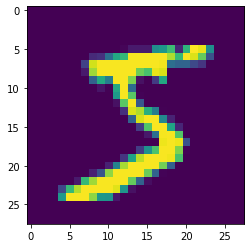

In [19]:
plt.imshow(single_image)

# PreProcessing Data

## Labels

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_train.shape

(60000,)

In [24]:
y_example = to_categorical(y_train)

In [25]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [26]:
y_example.shape

(60000, 10)

In [27]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
y_cat_test = to_categorical(y_test,10)

In [29]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

In [30]:
single_image.max()

255

In [31]:
single_image.min()

0

In [32]:
x_train = x_train/255
x_test = x_test/255

In [33]:
scaled_single = x_train[0]

In [34]:
scaled_single.max()

1.0

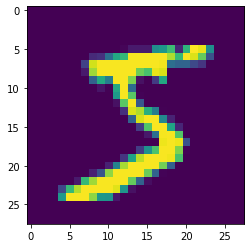

In [35]:
plt.imshow(scaled_single)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [38]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [39]:
x_train.shape

(60000, 28, 28, 1)

In [40]:
x_test = x_test.reshape(10000,28,28,1)

In [41]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout

In [46]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [48]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [49]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
checkpointer = ModelCheckpoint(filepath="mnist_digit.hdf5",
                                   monitor='val_loss', 
                                   save_best_only=True,
                                   verbose=1)

## Train the Model

In [51]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop,checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0285 - accuracy: 0.9915
Epoch 00001: val_loss improved from inf to 0.02775, saving model to mnist_digit.hdf5
60000/60000 [==============================] - 21s 351us/sample - loss: 0.0285 - accuracy: 0.9916 - val_loss: 0.0278 - val_accuracy: 0.9909
Epoch 2/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9924
Epoch 00002: val_loss improved from 0.02775 to 0.02362, saving model to mnist_digit.hdf5
60000/60000 [==============================] - 21s 345us/sample - loss: 0.0231 - accuracy: 0.9924 - val_loss: 0.0236 - val_accuracy: 0.9918
Epoch 3/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9943
Epoch 00003: val_loss did not improve from 0.02362
60000/60000 [==============================] - 21s 346us/sample - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0309 - val_accuracy: 0.9897
Epoch

## Evaluate the Model

In [52]:
model.metrics_names

['loss', 'accuracy']

In [53]:
losses = pd.DataFrame(model.history.history)

In [54]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.028526,0.991550,0.027752,0.9909
1,0.023145,0.992383,0.023616,0.9918
2,0.018200,0.994333,0.030946,0.9897
3,0.015770,0.994983,0.021559,0.9938
4,0.014588,0.995383,0.027816,0.9913


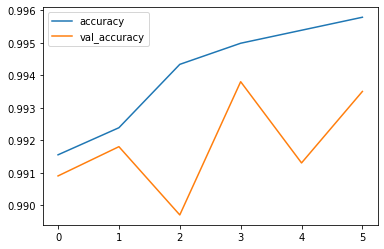

In [55]:
losses[['accuracy','val_accuracy']].plot()

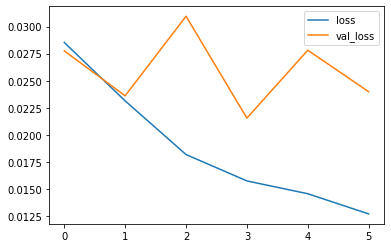

In [56]:
losses[['loss','val_loss']].plot()

In [57]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.023989642736021808, 0.9935]


In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
predictions = model.predict_classes(x_test)

In [60]:
y_cat_test.shape

(10000, 10)

In [61]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [62]:
predictions[0]

7

In [63]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [65]:
confusion_matrix(y_test,predictions)

array([[ 977,    0,    1,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1029,    0,    0,    0,    0,    3,    0,    0],
       [   0,    0,    2, 1003,    0,    5,    0,    0,    0,    0],
       [   0,    0,    0,    0,  976,    0,    0,    0,    0,    6],
       [   1,    0,    0,    2,    0,  887,    1,    1,    0,    0],
       [   4,    2,    1,    0,    3,    1,  946,    0,    1,    0],
       [   0,    4,    4,    0,    0,    0,    0, 1017,    1,    2],
       [   2,    0,    1,    0,    1,    0,    0,    0,  967,    3],
       [   1,    0,    1,    0,    4,    3,    0,    1,    1,  998]],
      dtype=int64)

In [66]:
import seaborn as sns

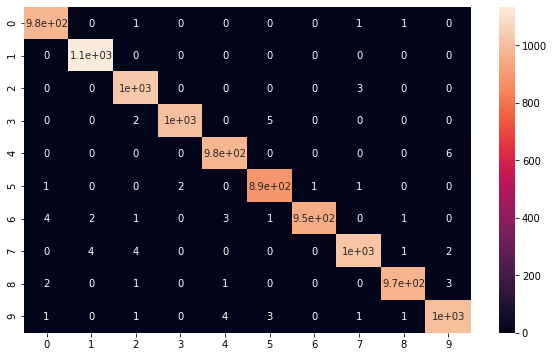

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [68]:
my_number = x_test[0]

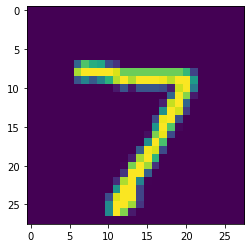

In [69]:
plt.imshow(my_number.reshape(28,28))

In [70]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)

In [71]:
model.load_weights("mnist_digit.hdf5")